In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

import os

# Checking ComBat Concordance

ComBat was run to correct batch effects between TCGA and GTEx. Let's plot the PearsonR between GTEx/Tumor and Normal/Tumor for each tissue, then compare those to the ComBat results.

In [3]:
def rank(ref_genes, genes_to_rank):
    temp = {}
    ranks = []
    inter = set(ref_genes).intersection(set(genes_to_rank))
    ref_genes = [x for x in ref_genes if x in inter]
    genes_to_rank = [x for x in genes_to_rank if x in inter]
    # print 'Length of intersection: {}'.format(len(inter))
    for i, gene in enumerate(ref_genes):
        temp[gene] = i
    for gene in genes_to_rank:
        ranks.append(temp[gene])
    return ranks

Collect uncorrected results

In [29]:
data = '../../data/'
tvn = {t[:-4]: pd.read_csv(os.path.join(data, 'TvN', t), sep='\t', index_col=0) for t in os.listdir(os.path.join(data, 'TvN'))}
gvt = {t[:-4]: pd.read_csv(os.path.join(data, 'GvT/results', t), sep='\t', index_col=0) for t in os.listdir(os.path.join(data, 'GvT/results'))}

In [30]:
unc_ps = []
for tissue in sorted(tvn.keys()):
    r = rank(tvn[tissue].index, gvt[tissue].index)
    unc_ps.append(pearsonr(np.array([x for x in xrange(len(r))]), np.array(r))[0])

Collect ComBat results

In [31]:
tvn = {t[:-4]: pd.read_csv(os.path.join(data, 'TvN-CBP', t), sep='\t', index_col=0) for t in os.listdir(os.path.join(data, 'TvN-CBP'))}
gvt = {t[:-4]: pd.read_csv(os.path.join(data, 'GvT-CBP/results', t), sep='\t', index_col=0) for t in os.listdir(os.path.join(data, 'GvT-CBP/results'))}

In [32]:
ps = []
for tissue in sorted(tvn.keys()):
    r = rank(tvn[tissue].index, gvt[tissue].index)
    ps.append(pearsonr(np.array([x for x in xrange(len(r))]), np.array(r))[0])

In [33]:
df = pd.DataFrame()
df['tissue'] = sorted(tvn.keys()) * 2
df['counts'] = unc_ps + ps
df['type'] = ['Uncorrected'] * len(unc_ps) + ['ComBat'] * len(ps)

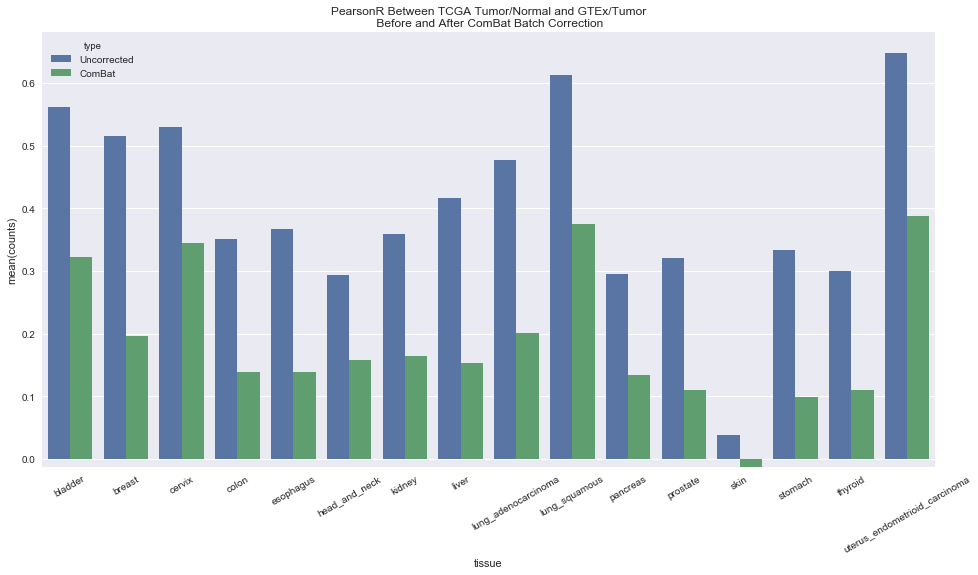

In [43]:
f, ax = plt.subplots(figsize=(16, 8))
g = sns.barplot(data=df, x='tissue', y='counts', hue='type', ax=ax)
g.set_xticklabels(labels=sorted(tvn.keys()), rotation=30)
plt.title('PearsonR Between TCGA Tumor/Normal and GTEx/Tumor\n Before and After ComBat Batch Correction');

ComBat was supposed to adjust our GTEx group such that it's more similar to our TCGA normals. Doesn't look like it did a good job.